### 157. Read N Characters Given Read4
__The improved second solution is available only for C/C++__

Given a file and assume that you can only read the file using a given method read4, implement a method to read n characters.

__Method read4__:

The API read4 reads four consecutive characters from file, then writes those characters into the buffer array buf4.

The return value is the number of actual characters read.

Note that read4() has its own file pointer, much like FILE *fp in C.

Definition of read4:

    Parameter:  char[] buf4
    Returns:    int

buf4[] is a destination, not a source. The results from read4 will be copied to buf4[].

File file("abcde"); // File is "abcde", initially file pointer (fp) points to 'a'
char[] buf4 = new char[4]; // Create buffer with enough space to store characters
read4(buf4); // read4 returns 4. Now buf4 = "abcd", fp points to 'e'
read4(buf4); // read4 returns 1. Now buf4 = "e", fp points to end of file
read4(buf4); // read4 returns 0. Now buf4 = "", fp points to end of file
 

__Method read__:

By using the read4 method, implement the method read that reads n characters from file and store it in the buffer array buf. Consider that you cannot manipulate file directly.

The return value is the number of actual characters read.

Definition of read:

    Parameters:	char[] buf, int n
    Returns:	int

buf[] is a destination, not a source. You will need to write the results to buf[].
Note:

Consider that you cannot manipulate the file directly. The file is only accessible for read4 but not for read.
The read function will only be called once for each test case.
You may assume the destination buffer array, buf, is guaranteed to have enough space for storing n characters.
 

Example 1:
Input: file = "abc", n = 4
Output: 3
Explanation: After calling your read method, buf should contain "abc". We read a total of 3 characters from the file, so return 3.
Note that "abc" is the file's content, not buf. buf is the destination buffer that you will have to write the results to.

Example 2:
Input: file = "abcde", n = 5
Output: 5
Explanation: After calling your read method, buf should contain "abcde". We read a total of 5 characters from the file, so return 5.

Example 3:
Input: file = "abcdABCD1234", n = 12
Output: 12
Explanation: After calling your read method, buf should contain "abcdABCD1234". We read a total of 12 characters from the file, so return 12.

Example 4:
Input: file = "leetcode", n = 5
Output: 5
Explanation: After calling your read method, buf should contain "leetc". We read a total of 5 characters from the file, so return 5.

Constraints:
* 1 <= file.length <= 500
* file consist of English letters and digits.
* 1 <= n <= 1000

#### Solution

__Interview Tendencies: Google and Facebook__

A long time ago, long ago, so long ago that no one can remember, algorithm interview questions were less popular. Ten years ago big companies mainly filtered the candidates by the university ranks, and the interview questions were like please describe how DDR memory works.

Nowadays there are some tendencies to merge this "old-style interview" with the modern algorithm questions interview. The idea is to ask a question which sounds like algorithmic but checks your knowledge of how do computers work: Round-robin CPU scheduling, C10k problem first solved by nginx, etc.

Is it good or bad? That's a reality to deal with, especially if we speak about Google or Facebook interviews.

Read N Characters Given Read4

Back to the problem, the question is "how does the memory work":

Because of the physical implementation, loading 4 bytes in DDR is faster than to load 1 byte 4 times.

On the majority of computers today, collection of 4 bytes, or 32 bits, is called a word. Most modern CPUs are optimized for the operations with words.

To sum up, the problem is a practical low-level question. The standard approach (Approach 1) to solve it using the internal buffer of 4 characters:

File -> Internal Buffer of 4 Characters -> Buffer of N Characters.
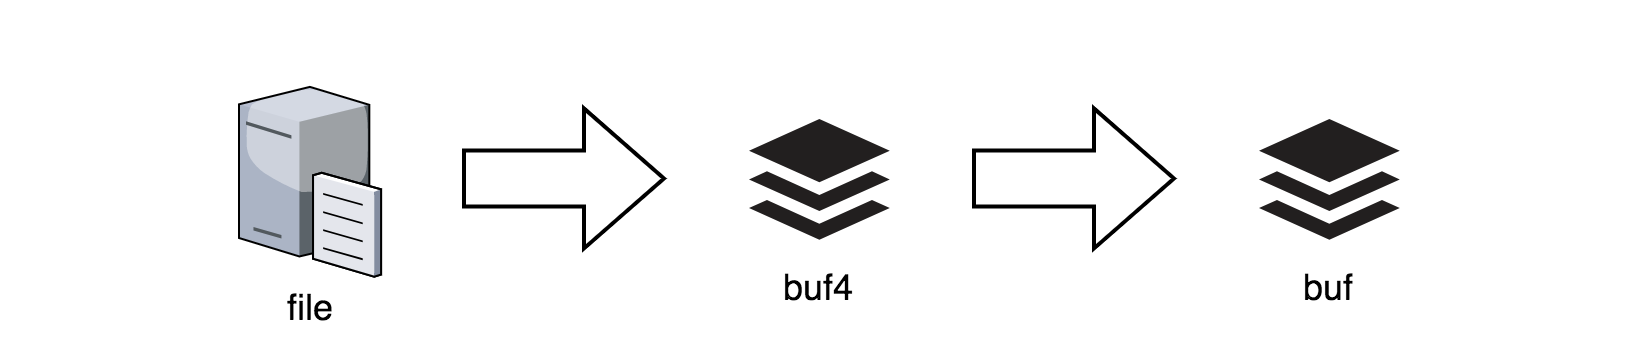
Once it's done, and you show your understanding of memory operations, the follow-up question is how to speed up. The answer (Approach 2) is quite straightforward. If it's possible, do not use the internal buffer of 4 characters to avoid the double copy:

File -> Buffer of N Characters.

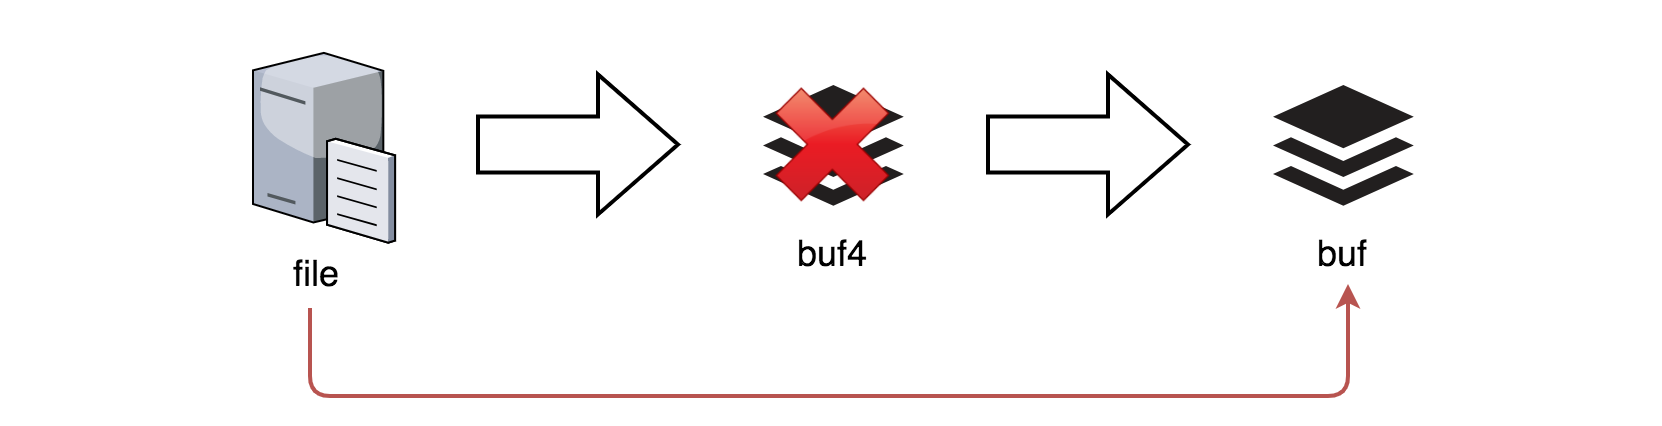

#### Approach 1: Use Internal Buffer of 4 Characters

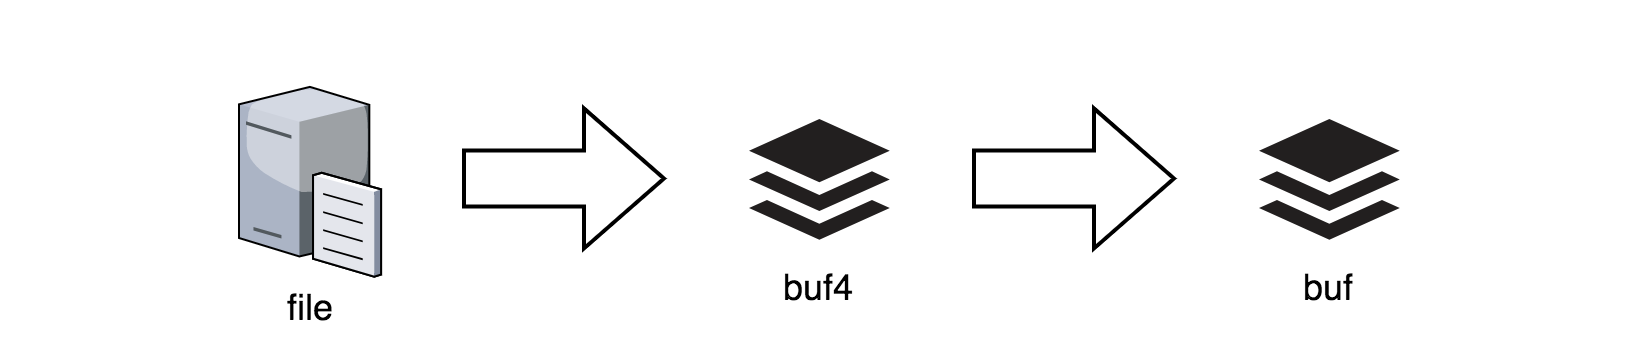

Algorithm

Let's use an internal buffer of 4 characters to solve this problem:

File -> Internal Buffer of 4 Characters -> Buffer of N Characters.

Initialize the number of copied characters copiedChars = 0, and the number of read characters: readChars = 4. It's convenient initialize readChars to 4 and then use readChars != 4 as EOF marker.

Initialize an internal buffer of 4 characters: buf4.

While number of copied characters is less than N: copiedChars < n and there are still characters in the file: readChars == 4:

Read from file into internal buffer: readChars = read4(buf4).

Copy the characters from internal buffer buf4 into main buffer buf one by one. Increase copiedChars after each character. In the number of copied characters is equal to N: copiedChars == n, interrupt the copy process and return copiedChars.

__Implementation__

class Solution:
    def read(self, buf, n) -> int:
        copied_chars = 0
        read_chars = 4
        buf4 = [''] * 4
        
        while copied_chars < n and read_chars == 4:
            read_chars = read4(buf4)
            
            for i in range(read_chars):
                if copied_chars == n:
                    return copied_chars
                buf[copied_chars] = buf4[i]
                copied_chars += 1
        
        return copied_chars
        
Complexity Analysis

Time complexity: O(N) to copy N characters.

Space complexity: O(1) to keep buf4 of 4 elements.

#### Approach 2: Speed Up: No Internal Buffer

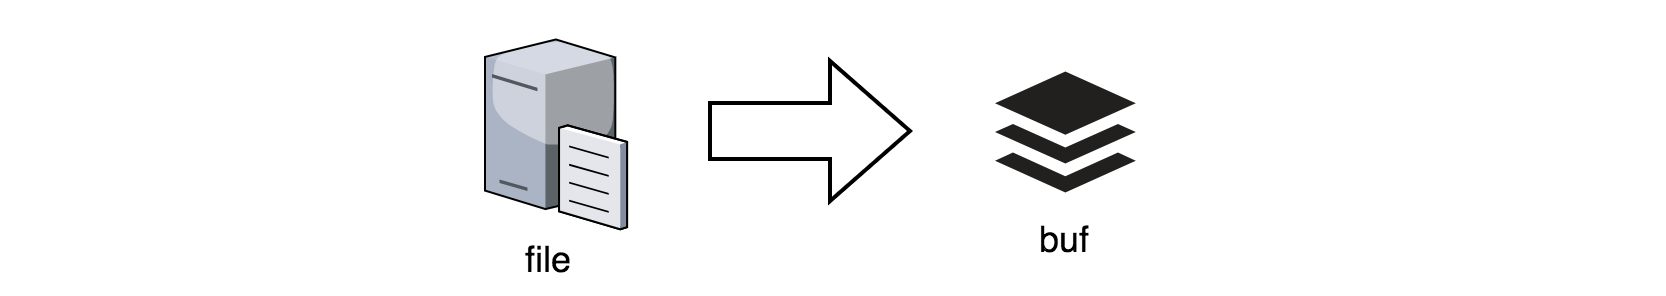

This solution is mainly suitable for the languages (C, C++, Golang) where pointers allow to append directly to the primary buffer buf.

Algorithm

Initialize the number of copied characters copiedChars = 0, and the number of read characters: readChars = 4.

While number of copied characters is less than N: copiedChars < n and there are still characters in the file: readChars == 4:

Read from file directly into buffer: read4(buf + copiedChars).

Increase copiedChars: copiedChars += readChars.

Now buf contains at least N characters. Return min(n, copiedChars).

Implementation

class Solution {
public:
    int read(char *buf, int n) {
        int copiedChars = 0, readChars = 4;
        
        while (copiedChars < n && readChars == 4) {
            readChars = read4(buf + copiedChars);
            copiedChars += readChars;
        }
        return min(n, copiedChars);
    }
};

Complexity Analysis

Time complexity: O(N) to copy N characters.

Space complexity: O(1).

### 158. Read N Characters Given Read4 II - Call multiple times
Given a file and assume that you can only read the file using a given method read4, implement a method read to read n characters. Your method read may be called multiple times.

Method read4:

The API read4 reads four consecutive characters from file, then writes those characters into the buffer array buf4.

The return value is the number of actual characters read.

Note that read4() has its own file pointer, much like FILE *fp in C.

Definition of read4:

    Parameter:  char[] buf4
    Returns:    int

buf4[] is a destination, not a source. The results from read4 will be copied to buf4[].
Below is a high-level example of how read4 works:


File file("abcde"); // File is "abcde", initially file pointer (fp) points to 'a'
char[] buf4 = new char[4]; // Create buffer with enough space to store characters
read4(buf4); // read4 returns 4. Now buf4 = "abcd", fp points to 'e'
read4(buf4); // read4 returns 1. Now buf4 = "e", fp points to end of file
read4(buf4); // read4 returns 0. Now buf4 = "", fp points to end of file
 

Method read:

By using the read4 method, implement the method read that reads n characters from file and store it in the buffer array buf. Consider that you cannot manipulate file directly.

The return value is the number of actual characters read.

Definition of read:

    Parameters:	char[] buf, int n
    Returns:	int

buf[] is a destination, not a source. You will need to write the results to buf[].
Note:

Consider that you cannot manipulate the file directly. The file is only accessible for read4 but not for read.
The read function may be called multiple times.
Please remember to RESET your class variables declared in Solution, as static/class variables are persisted across multiple test cases. Please see here for more details.
You may assume the destination buffer array, buf, is guaranteed to have enough space for storing n characters.
It is guaranteed that in a given test case the same buffer buf is called by read.
 

Example 1:

Input: file = "abc", queries = [1,2,1]
Output: [1,2,0]
Explanation: The test case represents the following scenario:
File file("abc");
Solution sol;
sol.read(buf, 1); // After calling your read method, buf should contain "a". We read a total of 1 character from the file, so return 1.
sol.read(buf, 2); // Now buf should contain "bc". We read a total of 2 characters from the file, so return 2.
sol.read(buf, 1); // We have reached the end of file, no more characters can be read. So return 0.
Assume buf is allocated and guaranteed to have enough space for storing all characters from the file.
Example 2:

Input: file = "abc", queries = [4,1]
Output: [3,0]
Explanation: The test case represents the following scenario:
File file("abc");
Solution sol;
sol.read(buf, 4); // After calling your read method, buf should contain "abc". We read a total of 3 characters from the file, so return 3.
sol.read(buf, 1); // We have reached the end of file, no more characters can be read. So return 0.
 

Constraints:
* 1 <= file.length <= 500
* file consist of English letters and digits.
* 1 <= queries.length <= 10
* 1 <= queries[i] <= 500

In [ ]:
# The read4 API is already defined for you
# def read4(buf4: List[str]) -> int:
class Solution:
    '''
        Most voted accepted Python solution
    '''
    def __init__(self):
        self.queue = []

    def read(self, buf, n):
        idx = 0
        while True:
            buf4 = [""]*4
            l = read4(buf4)
            self.queue.extend(buf4)
            curr = min(len(self.queue), n-idx)
            for i in range(curr):
                buf[idx] = self.queue.pop(0)
                idx+=1
            if curr == 0:
                break 
        return idx